In [1]:
#%% Modules
import pyvisa as visa
import awg_support as awg
import dso_support as dso
import numpy as np 
import matplotlib.pyplot as plt
import csv
import time
import serial

In [7]:
#%% Initialisation
# Setup for the tools
ID_awg = 'USB0::0xF4EC::0x1102::SDG2XFBC7R0482::INSTR'
rm = awg.resourcer()
inst_awg = awg.initialise(ID_awg, rm)

ser = serial.Serial('COM3', 115200, timeout=1)

In [8]:
sd = np.linspace(1,2,11)
Ts = 1/8e6
tw = np.arange(0, 1, Ts)

In [9]:
def run(sd):
    ktime = []

    awg.set_output_state(inst_awg,channel=2,val="ON")
    wave = np.random.normal(0,sd,size=np.shape(tw))
    awg.arb_wave_constructor(inst_awg, wave, tw,freq=80e3,channel=2)

    while True:
        if ser.in_waiting > 0:
                line = ser.readline()
                try:
                    val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                    # print(val)
                    if(val == "start"):
                        print("start")
                        break
                except ValueError:
                    continue
                except UnicodeDecodeError:
                    print("error")
                
    while True:
        if ser.in_waiting > 0:
                line = ser.readline()
                try:
                    val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                    # print(val)
                    if(val == "kt"):
                        line = ser.readline()
                        val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                        # print(val, float(val))
                        ktime.append(float(val))
                        print(ktime[-1])
                    elif(val == "end"):
                        print("end")
                        break
                except ValueError:
                    continue
                except UnicodeDecodeError:
                    print("error")

    return ktime

In [11]:
KT = []
for  i in range(len(sd)):
    print("current sd = ", sd[i])
    ktime = run(sd[i])
    KT.append(ktime)

current sd =  1.0
start
9600.84
6500.52
end
current sd =  1.1
start
13500.37
7324.61
end
current sd =  1.2
start
9605.5
2293.3
end
current sd =  1.3
start
8305.54
4495.27
end
current sd =  1.4
start
7355.94
4074.17
2537.09
end
current sd =  1.5
start
7020.68
60907.87
end
current sd =  1.6


KeyboardInterrupt: 

In [6]:
ser.close()
awg.set_output_state(inst_awg,channel=2,val="OFF")
awg.set_output_state(inst_awg,channel=1,val="OFF")
awg.deinitialise(inst_awg)
awg.deinitialise(rm)


In [7]:
print(KT)

[[57156.38, 121573.38], [63057.43, 57695.5], [35875.78, 30838.43], [24615.02, 17917.06], [17654.83, 13486.9], [13510.03, 9902.96], [11339.17, 7132.7], [10074.95, 5726.8], [8801.53, 4610.04], [7965.49, 3992.87], [7357.4, 4285.82]]


In [8]:
kt = []
for i in range(len(sd)):
    kt.append(np.mean(KT[i][1]))


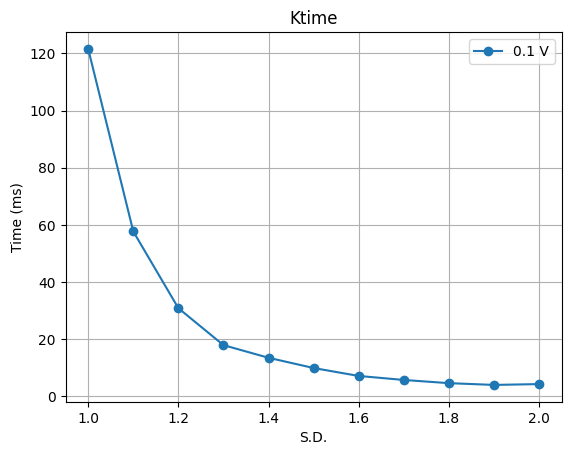

In [9]:
plt.plot(sd, np.array(kt)/1e3, "-o", label = "0.1 V")
plt.xlabel("S.D.")
plt.ylabel("Time (ms)")
plt.title("Ktime")
plt.legend()
plt.grid()

In [12]:
Kt_100 = np.array([75804.66, 37081.47, 20765.69, 14783.99, 10114.07, 7905.03, 6380.39, 4976.49, 4125.87, 3542.3, 4235.16])
Kt_75 = np.array([121573.38, 57695.5, 30838.43, 17917.06, 13486.9, 9902.96, 7132.7, 5726.8, 4610.04, 3992.87, 4285.82])
Kt_50 =  np.array([225451.8, 92181.4, 41022.75, 24939.97, 16596.76, 11944.56, 8777.86, 7105.07, 5432.45, 4975.76, 5131.87])


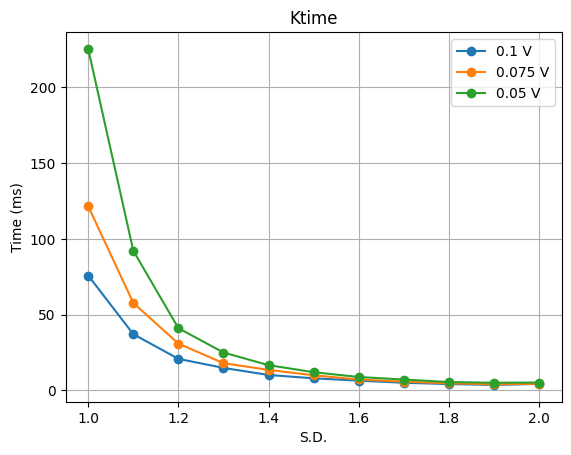

In [13]:
plt.plot(sd, Kt_100/1e3, "-o", label = "0.1 V")
plt.plot(sd, Kt_75/1e3, "-o", label = "0.075 V")
plt.plot(sd, Kt_50/1e3, "-o", label = "0.05 V")
plt.xlabel("S.D.")
plt.ylabel("Time (ms)")
plt.title("Ktime")
plt.legend()
plt.grid()